<h1>Comparing Different Association Rule Mining</h1>
<hr style='height: 3px' />

In [23]:
# !pip install mlxtend

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='darkgrid')
import itertools
import time

from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder

from datetime import datetime
from decimal import Decimal

In [4]:
import warnings
warnings.filterwarnings("ignore")

## Dataset

In [356]:
df_grocery = pd.read_csv('grocery.csv')
data1 = list(df_grocery["items"].apply(lambda x:x.split(",")))

transactionEncoder = TransactionEncoder()
data_array = transactionEncoder.fit(data1).transform(data1)
df_grocery_transformed = pd.DataFrame(data_array, columns=transactionEncoder.columns_)
df_grocery_transformed

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,True,False,False,True,False,False
1,False,True,True,False,False,False,False,False,False,False,True
2,False,False,True,False,False,False,True,True,True,False,False
3,True,False,False,False,False,False,False,True,False,False,True
4,False,True,True,False,False,False,False,False,False,False,True
5,False,False,False,False,False,True,False,True,False,False,True
6,True,False,True,False,False,False,False,True,False,False,True
7,False,False,True,False,False,False,True,True,False,False,True
8,False,False,True,False,False,False,False,False,True,False,False
9,True,False,False,True,True,True,False,False,False,False,False


In [358]:
df = pd.read_csv('electronics.csv')
data2 = list(df["items"].apply(lambda x:x.split(",")))

transactionEncoder = TransactionEncoder()
data_array = transactionEncoder.fit(data2).transform(data2)
df_transformed = pd.DataFrame(data_array, columns=transactionEncoder.columns_)
df_transformed

,Earphones,HDD,Mobile,Mobile_Charger,Mobile_Cover,Mouse,PC,PC_bag,PC_desk,Screen
0,False,False,True,True,True,False,False,False,False,False
1,True,False,True,False,False,False,False,False,False,True
2,False,False,False,False,False,True,True,True,True,False
3,True,True,False,True,False,False,False,False,False,False
4,False,False,True,False,True,False,False,False,False,True
5,False,True,False,False,False,False,True,False,False,False
6,False,False,False,True,False,True,False,False,True,False
7,False,False,True,False,True,False,False,False,False,False
8,False,False,False,False,False,False,True,True,False,False
9,False,False,False,False,True,False,False,False,False,True


In [360]:
df = pd.read_csv('food.csv')
data3 = list(df["items"].apply(lambda x:x.split(",")))

transactionEncoder = TransactionEncoder()
data_array = transactionEncoder.fit(data3).transform(data3)
df_transformed = pd.DataFrame(data_array, columns=transactionEncoder.columns_)
df_transformed

,Apple,Corn,Dill,Eggs,Icecream,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,False,False,True
1,False,False,True,True,False,False,True,False,False,True
2,True,False,False,True,False,True,False,False,False,False
3,False,True,False,False,False,True,False,False,True,True
4,False,True,False,True,True,False,False,True,False,False


In [362]:
df = pd.read_csv('restaurant.csv')
data4 = list(df["items"].apply(lambda x:x.split(",")))

transactionEncoder = TransactionEncoder()
data_array = transactionEncoder.fit(data4).transform(data4)
df_transformed = pd.DataFrame(data_array, columns=transactionEncoder.columns_)
df_transformed

,A,American,B,BRONX,BROOKLYN,C,Chinese,Italian,Japanese,MANHATTAN,QUEENS
0,True,False,False,False,True,False,True,False,False,False,False
1,False,True,False,False,False,True,False,False,False,True,False
2,False,False,False,True,False,True,True,False,False,False,False
3,True,True,False,False,False,False,False,False,False,True,False
4,True,True,False,False,False,False,False,False,False,True,False
5,False,True,False,False,False,True,False,False,False,True,False
6,True,False,False,True,False,False,False,True,False,False,False
7,False,False,True,False,False,False,True,False,False,True,False
8,False,False,True,False,False,False,False,True,False,True,False
9,True,False,False,False,False,False,True,False,False,True,False


## Brute Force

In [377]:
# Association rules generator for support item sets
def associationRulesCount(supportList, supportListCount):
    ruleCount = 0
    for ele in supportList:
        eleSupport = supportListCount[supportList.index(ele)]
        for item in supportList:
            if((len(item) == len(ele) - 1) and set(item).issubset(ele)):
                itemSupport = supportListCount[supportList.index(item)]
                if ele > item:
                    ruleCount += 1

    if(ruleCount == 0):
        print('No Association Rules can be formed')

def associationRules(supportList, supportListCount):
    
    ruleCount = 0
    for ele in supportList:
        eleSupport = supportListCount[supportList.index(ele)]
        for item in supportList:
            if((len(item) == len(ele) - 1) and set(item).issubset(ele)):
                itemSupport = supportListCount[supportList.index(item)]
                ruleConfidence = (eleSupport / itemSupport) * 100
                if ruleConfidence >= minConfidence:
                    if ele > item:
                        ruleCount += 1

    if(ruleCount == 0):
        print('No Association Rules can be formed')

    
# Frequent item set generator based on transactions and minimum support
def getFrequentItem(transactions, listOfItemSet, minSupportItems):
    list = []
    for itemSet in listOfItemSet:
        itemSetOccurence = countItemSetOccurence(transactions, itemSet)        
        supportList.append(itemSet)
        supportListCount.append(itemSetOccurence)
        list.append(itemSet)
    return list

def getFrequentItemSet(transactions, listOfItemSet, minSupportItems):
    list = []
    for itemSet in listOfItemSet:
        itemSetOccurence = countItemSetOccurence(transactions, itemSet)
        if itemSetOccurence >= minSupportItems:
            supportList.append(itemSet)
            supportListCount.append(itemSetOccurence)
            list.append(itemSet)
    return list


# Item set generator by creating item combinations
def combineItems(itemSets, setItems):
    combineList = []
    for combination in itertools.combinations(itemSets, 2):
        temp = [] + combination[0]
        for item in combination[1]:
            if item not in temp:
                temp.append(item)
        if compareList(combineList, temp) == False and len(temp) == setItems:
            combineList.append(temp)
    return combineList

def countItemSetOccurence(transactions, itemSet):
    count = 0
    for transaction in transactions:
        findAll = True
        for item in itemSet:
            if item not in transaction:
                findAll = False
                break
        if findAll:
            count += 1
    return count

def compareList(list, item):
    for ele in list:
        if(set(ele) - set(item) == set([])):
            return True
    return False


'''
Script Start Point

'''

minSupport = 20
minConfidence = 60

# Loading the data 
start_time = time.time()
transactions = data3
items = []

for i in transactions:
    for j in i:
        if j not in items:
            items.append(j)

minSupportItems = ((minSupport * len(transactions)) / 100)
noOfItems = len(items)
listOfItemSet = []

# Creating initial list of item set
for item in items:
    listOfItemSet.append([item])

supportList = []
supportListCount = []

# Generating the first set of frequent item
frequentItemSet = getFrequentItem(transactions, listOfItemSet, minSupportItems)

setItems = 2
while True:
    if len(frequentItemSet) < 2:
        break
    else:
        # Generating the combination of items from frequent set
        candidateSet = combineItems(frequentItemSet, setItems)
        # Updating the frequent set with new combinations
        frequentItemSet = getFrequentItem(transactions, candidateSet,minSupportItems)
        setItems += 1

# Generating the Association Rules
associationRulesCount(supportList, supportListCount)

listOfItemSet = []

# Creating initial list of item set
for item in items:
    listOfItemSet.append([item])

supportList = []
supportListCount = []

# Generating the first set of frequent item
frequentItemSet = getFrequentItemSet(transactions, listOfItemSet, minSupportItems)

setItems = 2

while True:
    if len(frequentItemSet) < 2:
        break
    else:
        # Generating the combination of items from frequent set
        candidateSet = combineItems(frequentItemSet, setItems)
        # Updating the frequent set with new combinations
        frequentItemSet = getFrequentItemSet(transactions, candidateSet,minSupportItems)
        setItems += 1

associationRules(supportList,supportListCount)
print("Time Taken %s seconds" % (time.time() - start_time))

Time Taken 2.4656383991241455 seconds


In [395]:
from decimal import Decimal
import itertools
import time


# Association rules generator for support item sets
def associationRulesCount(supportList, supportListCount):
    ruleCount = 0
    for ele in supportList:
        eleSupport = supportListCount[supportList.index(ele)]
        for item in supportList:
            if((len(item) == len(ele) - 1) and set(item).issubset(ele)):
                itemSupport = supportListCount[supportList.index(item)]
                if ele > item:
                    ruleCount += 1
 
    print('TOTAL NUMBER OF RULES FORMED',ruleCount)
    if(ruleCount == 0):
        print('No Association Rules can be formed')


def associationRules(supportList, supportListCount):
    ruleCount = 0
    for ele in supportList:
        eleSupport = supportListCount[supportList.index(ele)]
        for item in supportList:
            if((len(item) == len(ele) - 1) and set(item).issubset(ele)):
                itemSupport = supportListCount[supportList.index(item)]
                ruleConfidence = (eleSupport / itemSupport) * 100
                if ruleConfidence >= minConfidence:
                    if ele > item:
                        ruleCount += 1
                        print(' , '.join(str(x) for x in item)+' ------> '+' , '.join(str(e) for e in set(ele)-set(item))+'\tSupport:'+str(
                            round(Decimal(eleSupport/len(transactions)*100), 1))+'%\tconfidence:'+str(round(Decimal(ruleConfidence), 1))+' %')
    if(ruleCount == 0):
        print('No Association Rules can be formed')


# Frequent item set generator based on transactions and minimum support
def getFrequentItem(transactions, listOfItemSet, minSupportItems):
    list = []
    for itemSet in listOfItemSet:
        itemSetOccurence = countItemSetOccurence(transactions, itemSet)        
        supportList.append(itemSet)
        supportListCount.append(itemSetOccurence)
        list.append(itemSet)
    return list


def getFrequentItemSet(transactions, listOfItemSet, minSupportItems):
    list = []
    for itemSet in listOfItemSet:
        itemSetOccurence = countItemSetOccurence(transactions, itemSet)
        if itemSetOccurence >= minSupportItems:
            supportList.append(itemSet)
            supportListCount.append(itemSetOccurence)
            list.append(itemSet)
    return list


# Item set generator by creating item combinations
def combineItems(itemSets, setItems):
    combineList = []
    for combination in itertools.combinations(itemSets, 2):
        temp = [] + combination[0]
        for item in combination[1]:
            if item not in temp:
                temp.append(item)
        if compareList(combineList, temp) == False and len(temp) == setItems:
            combineList.append(temp)
    return combineList



def countItemSetOccurence(transactions, itemSet):
    count = 0
    for transaction in transactions:
        findAll = True
        for item in itemSet:
            if item not in transaction:
                findAll = False
                break
        if findAll:
            count += 1
    return count




def compareList(list, item):
    for ele in list:
        if(set(ele) - set(item) == set([])):
            return True
    return False


'''
Script Start Point
'''

minSupport = 20
minConfidence = 60

# Loading the data 
start_time = time.time()
transactions = data2
items = []

for i in transactions:
    for j in i:
        if j not in items:
            items.append(j)

minSupportItems = ((minSupport * len(transactions)) / 100)
noOfItems = len(items)

listOfItemSet = []

# Creating initial list of item set
for item in items:
    listOfItemSet.append([item])

supportList = []
supportListCount = []

# Generating the first set of frequent item
frequentItemSet = getFrequentItem(transactions, listOfItemSet, minSupportItems)

setItems = 2
while True:
    if len(frequentItemSet) < 2:
        break
    else:
        # Generating the combination of items from frequent set
        candidateSet = combineItems(frequentItemSet, setItems)
        # Updating the frequent set with new combinations
        frequentItemSet = getFrequentItem(transactions, candidateSet,minSupportItems)
        setItems += 1

# Generating the Association Rules
associationRulesCount(supportList, supportListCount)


listOfItemSet = []

# Creating initial list of item set
for item in items:
    listOfItemSet.append([item])

supportList = []
supportListCount = []

# Generating the first set of frequent item
frequentItemSet = getFrequentItemSet(transactions, listOfItemSet, minSupportItems)

setItems = 2



while True:
    if len(frequentItemSet) < 2:
        break
    else:
        # Generating the combination of items from frequent set
        candidateSet = combineItems(frequentItemSet, setItems)
        # Updating the frequent set with new combinations
        frequentItemSet = getFrequentItemSet(transactions, candidateSet,minSupportItems)
        setItems += 1


associationRules(supportList,supportListCount)

print("Total time taken: %s seconds" % (time.time() - start_time))

TOTAL NUMBER OF RULES FORMED 3084
Mobile ------> Mobile_Cover	Support:30.0%	confidence:75.0 %
PC ------> PC_bag	Support:20.0%	confidence:66.7 %
Mouse ------> PC_desk	Support:20.0%	confidence:100.0 %
Total time taken: 2.6883952617645264 seconds


## Apriori

In [335]:
def apriori_algorithm(csv):
    df = pd.read_csv(csv)
    data = list(df["items"].apply(lambda x:x.split(",")))
    
    unique_items = set()
    
    for transaction in data:
        for i in transaction:
            if i not in unique_items:
                unique_items.add(i)
    
    print("Number of transactions:", len(data))
    print("Number of unique items:", len(unique_items))
    
    transactionEncoder = TransactionEncoder()
    data_array = transactionEncoder.fit(data).transform(data)
    df_transformed = pd.DataFrame(data_array, columns=transactionEncoder.columns_)
    
    time_taken = %timeit -n 100 -r 10 -o apriori(df_transformed, min_support=0.2)
    frequent_itemsets = time_taken.average * (10**6)

    print('Number of frequent_itemsets:', len(apriori(df_transformed, min_support=0.2)))

    
    df = apriori(df_transformed, min_support = 0.2, use_colnames = True)
    time_taken = %timeit -n 100 -r 10 -o association_rules(df, min_threshold = 0.6)
    rules = time_taken.average * (10**6)

    print('Number of association_rules:', len(association_rules(df, min_threshold = 0.6)))

    return frequent_itemsets + rules

In [383]:
time_apriori_dataset1 = apriori_algorithm('grocery.csv')
print('Total time taken:', time_apriori_dataset1)
print()

time_apriori_dataset2 = apriori_algorithm('electronics.csv')
print('Total time taken:', time_apriori_dataset2)
print()

time_apriori_dataset3 = apriori_algorithm('food.csv')
print('Total time taken:', time_apriori_dataset3)
print()

time_apriori_dataset4 = apriori_algorithm('restaurant.csv')
print('Total time taken:', time_apriori_dataset4)

Number of transactions: 15
Number of unique items: 11
740 μs ± 46.5 μs per loop (mean ± std. dev. of 10 runs, 100 loops each)
Number of frequent_itemsets: 18
641 μs ± 24.9 μs per loop (mean ± std. dev. of 10 runs, 100 loops each)
Number of association_rules: 10
Total time taken: 1381.8388000363484

Number of transactions: 10
Number of unique items: 10
688 μs ± 16.8 μs per loop (mean ± std. dev. of 10 runs, 100 loops each)
Number of frequent_itemsets: 15
627 μs ± 35.2 μs per loop (mean ± std. dev. of 10 runs, 100 loops each)
Number of association_rules: 8
Total time taken: 1314.303100341931

Number of transactions: 5
Number of unique items: 10
1.16 ms ± 40 μs per loop (mean ± std. dev. of 10 runs, 100 loops each)
Number of frequent_itemsets: 52
795 μs ± 28.6 μs per loop (mean ± std. dev. of 10 runs, 100 loops each)
Number of association_rules: 104
Total time taken: 1953.2545000547543

Number of transactions: 20
Number of unique items: 11
659 μs ± 18.1 μs per loop (mean ± std. dev. of 10

## FPGrowth

In [340]:
def fpGrowth_algorithm(csv):
    df = pd.read_csv(csv)
    data = list(df["items"].apply(lambda x:x.split(",")))
    
    unique_items = set()
    
    for transaction in data:
        for i in transaction:
            if i not in unique_items:
                unique_items.add(i)
    
    print("Number of transactions:", len(data))
    print("Number of unique items:", len(unique_items))
    
    transactionEncoder = TransactionEncoder()
    data_array = transactionEncoder.fit(data).transform(data)
    df_transformed = pd.DataFrame(data_array, columns=transactionEncoder.columns_)

    
    time_taken = %timeit -n 100 -r 10 -o fpgrowth(df_transformed, min_support=0.2)
    frequent_itemsets = time_taken.average * (10**6)

    print('Number of frequent_itemsets:', len(fpgrowth(df_transformed, min_support=0.2)))
    
    df = fpgrowth(df_transformed, min_support = 0.2, use_colnames = True)
    time_taken = %timeit -n 100 -r 10 -o association_rules(df, min_threshold = 0.6)
    rules = time_taken.average * (10**6)

    print('Number of association_rules:', len(association_rules(df, min_threshold = 0.6)))
    
    return rules + frequent_itemsets

In [350]:
time_fpGrowth_dataset1 = fpGrowth_algorithm('grocery.csv')
print('Total time taken:', time_fpGrowth_dataset1)
print()

time_fpGrowth_dataset2 = fpGrowth_algorithm('electronics.csv')
print('Total time taken:', time_fpGrowth_dataset2)
print()

time_fpGrowth_dataset3 = fpGrowth_algorithm('food.csv')
print('Total time taken:', time_fpGrowth_dataset3)
print()

time_fpGrowth_dataset4 = fpGrowth_algorithm('restaurant.csv')
print('Total time taken:', time_fpGrowth_dataset4)

Number of transactions: 19
Number of unique items: 11
357 μs ± 17.6 μs per loop (mean ± std. dev. of 10 runs, 100 loops each)
Number of frequent_itemsets: 14
624 μs ± 21.2 μs per loop (mean ± std. dev. of 10 runs, 100 loops each)
Number of association_rules: 4
Total time taken: 980.9963001171127

Number of transactions: 10
Number of unique items: 10
323 μs ± 5.41 μs per loop (mean ± std. dev. of 10 runs, 100 loops each)
Number of frequent_itemsets: 15
633 μs ± 35 μs per loop (mean ± std. dev. of 10 runs, 100 loops each)
Number of association_rules: 8
Total time taken: 956.019299919717

Number of transactions: 5
Number of unique items: 10
376 μs ± 17 μs per loop (mean ± std. dev. of 10 runs, 100 loops each)
Number of frequent_itemsets: 52
805 μs ± 33.2 μs per loop (mean ± std. dev. of 10 runs, 100 loops each)
Number of association_rules: 104
Total time taken: 1180.6764004286379

Number of transactions: 20
Number of unique items: 11
311 μs ± 6.94 μs per loop (mean ± std. dev. of 10 runs,

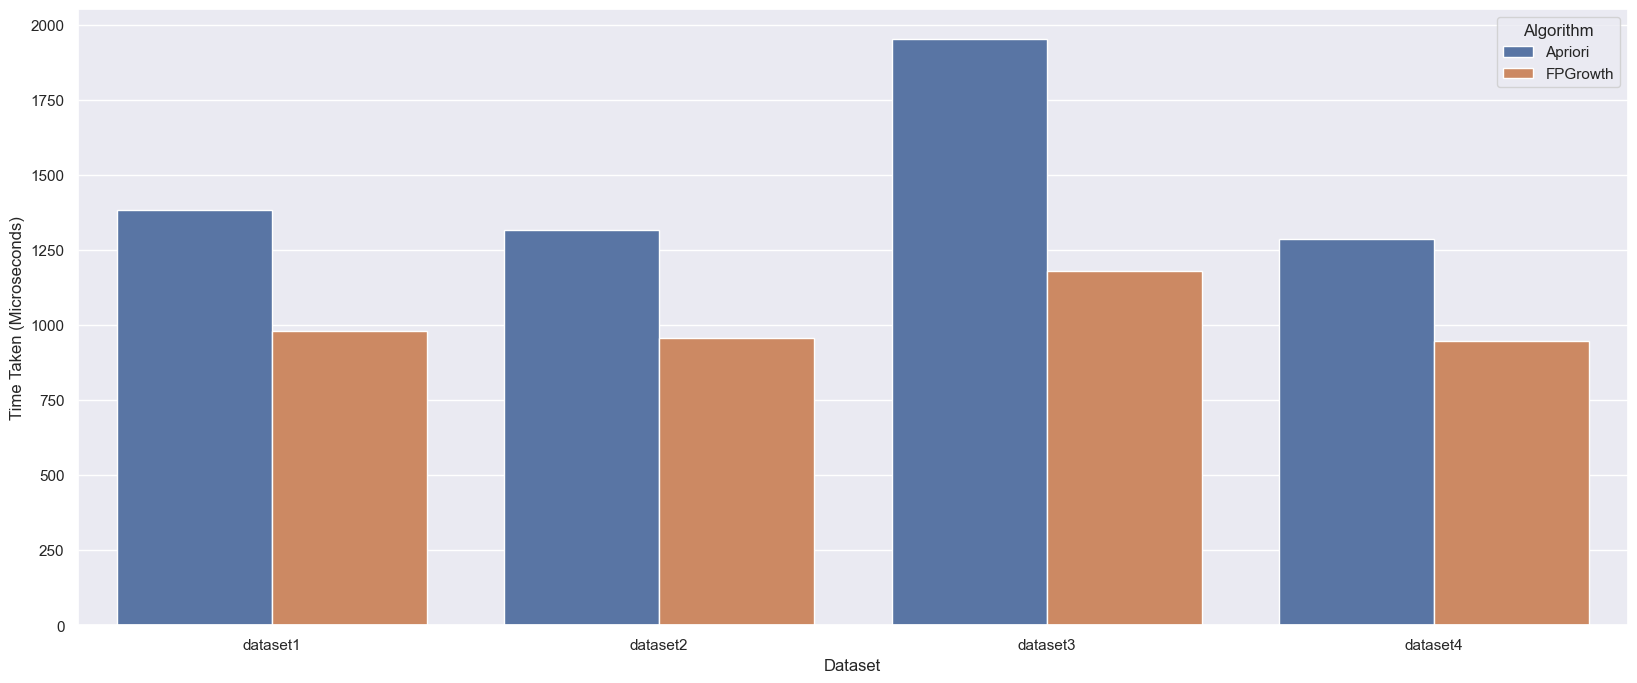

In [400]:
data = [
    ['dataset1', 'Apriori', time_apriori_dataset1],
    ['dataset2', 'Apriori', time_apriori_dataset2],
    ['dataset3', 'Apriori', time_apriori_dataset3],
    ['dataset4', 'Apriori', time_apriori_dataset4],
    ['dataset1', 'FPGrowth', time_fpGrowth_dataset1],
    ['dataset2', 'FPGrowth', time_fpGrowth_dataset2],
    ['dataset3', 'FPGrowth', time_fpGrowth_dataset3],
    ['dataset4', 'FPGrowth', time_fpGrowth_dataset4],
]

df = pd.DataFrame(data, columns=['Dataset', 'Algorithm', 'Time Taken'])

fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.barplot(df, x="Dataset", y="Time Taken", hue="Algorithm", ax=ax)
ax.tick_params(axis='x', rotation=0)
ax.set_xlabel('Dataset')
ax.set_ylabel('Time Taken (Microseconds)')

plt.show()